## EDA for hobby

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data dir
data_dir = 'D:/thon/project/tourism/02.국민여가활동조사/3.데이터'

# data load
h21 = pd.read_csv(data_dir + '/hobby_21.csv')
h21 = pd.DataFrame(h21)

# 스포츠맨 칼럼
h21['sportsman'] = 0
sports_man = h21['q6'].isin(['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']) # 1581명의 스포츠인
h21['sportsman'] = sports_man.astype(int)
sports_column = ['q45', 'DM11', 'sportsman']
df = h21[sports_column]
df.columns = ['weekly_worked', 'city', 'target']
df

C:\Users\sujin\AppData\Local\Temp\ipykernel_7280\3538042223.py:10: DtypeWarning: Columns (90,100,101,102,103,104,105,126) have mixed types. Specify dtype option on import or set low_memory=False.
  h21 = pd.read_csv(data_dir + '/hobby_21.csv')


,weekly_worked,city,target
0,1,15,0
1,1,15,0
2,2,15,0
3,1,15,0
4,1,15,0
...,...,...,...
10044,1,14,0
10045,1,14,1
10046,2,14,1
10047,2,14,0


In [69]:
city_target = df.groupby(['city', 'target']).count()
city = df.groupby(['city']).count()
city_percent = round(city_target[city_target.columns[:1]] / city[city.columns[:1]] * 100, 1).reset_index()
city_percent.index = ['서울', '서울', '부산', '부산', '대구', '대구', '인천', '인천', '광주', '광주', '대전', '대전', '울산', '울산',
'세종', '세종', '경기', '경기', '강원', '강원', '충북', '충북', '충남', '충남', '전북', '전북', '전남', '전남', '경북', '경북', '경남', '경남', '제주', '제주']
city_percent.columns = ['city', 'target', 'percent']
descend = pd.DataFrame(city_percent['percent'].sort_values(ascending = False)[17:])
ascend = pd.DataFrame(city_percent['percent'].sort_values(ascending = False)[:17])

# 비스포츠인:스포츠인 비율
# 충남 91.1: 8.9
# 서울 85.4:14.6
# 제주 70.8:29.8

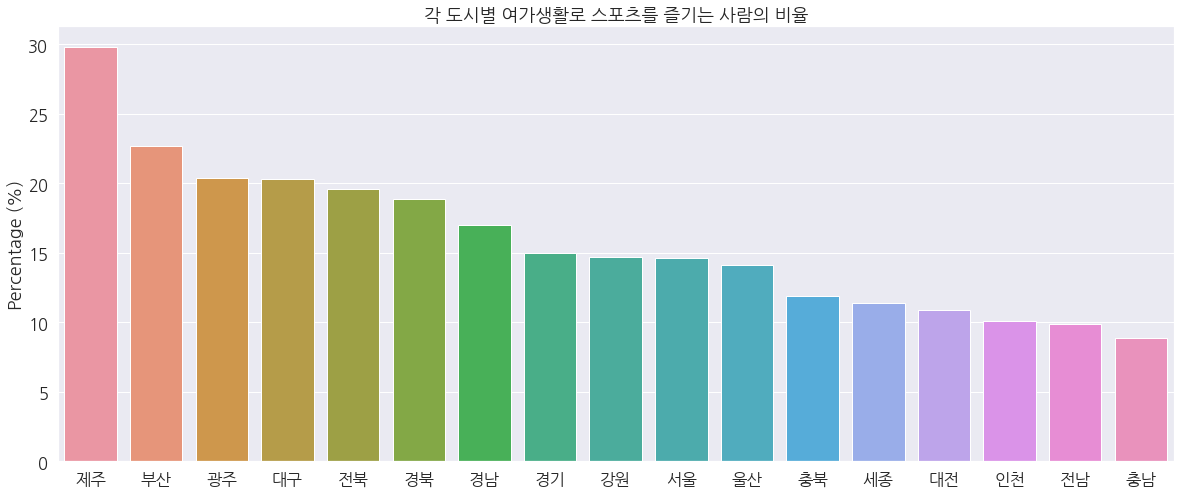

In [70]:
### 지역별 스포츠인 비율 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.5)
plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = descend.index, y = 'percent', data = descend)
ax.set_title('각 도시별 여가생활로 스포츠를 즐기는 사람의 비율')
ax.set_ylabel('Percentage (%)')
plt.show()